<a href="https://colab.research.google.com/github/jaissugam/Lane-Line-Detection/blob/main/Lane_Line_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import clear_output, Image
import base64

Reading image

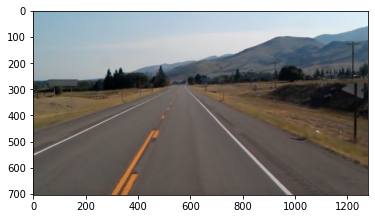

(704, 1279, 3)


In [ ]:
image = cv2.imread('road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()
print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]

Cropping image

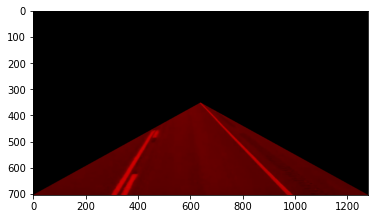

In [ ]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

cropped_image = region_of_interest(image,
                np.array([region_of_interest_vertices], np.int32),)

plt.imshow(cropped_image)
plt.show()

Hough Transform

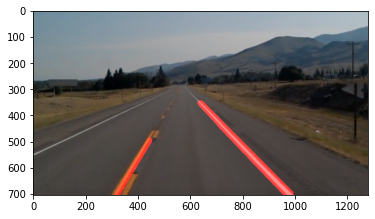

In [ ]:
def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (255, 0, 0), thickness=20)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)
lines = cv2.HoughLinesP(cropped_image,
                        rho=1,
                        theta=np.pi/180,
                        threshold=100,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)
image_with_lines = draw_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()

Application on video frames


In [ ]:
def process(image):
    print(image.shape)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
        (0, height),
        (width/2, height/2),
        (width, height)
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 100, 120)
    cropped_image = region_of_interest(canny_image,
                    np.array([region_of_interest_vertices], np.int32),)
    lines = cv2.HoughLinesP(cropped_image,
                            rho=2,
                            theta=np.pi/180,
                            threshold=50,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=100)
    image_with_lines = draw_the_lines(image, lines)
    return image_with_lines


def arrayShow (imageArray):
   ret, png = cv2.imencode('.png', imageArray)
   encoded = base64.b64encode(png)
   return Image(data=encoded.decode('ascii'))

video_capture = cv2.VideoCapture('lane2.mp4')
while video_capture.isOpened():
    success, frame = video_capture.read()
    frame=process(frame)
    clear_output(wait=True)
    img = arrayShow(frame)
    display(img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

Buffered data was truncated after reaching the output size limit.